In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# metadata 
print(automobile.metadata) 


{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [4]:
# variable information 
print(automobile.variables) 

                 name     role         type demographic  \
0               price  Feature   Continuous        None   
1         highway-mpg  Feature   Continuous        None   
2            city-mpg  Feature   Continuous        None   
3            peak-rpm  Feature   Continuous        None   
4          horsepower  Feature   Continuous        None   
5   compression-ratio  Feature   Continuous        None   
6              stroke  Feature   Continuous        None   
7                bore  Feature   Continuous        None   
8         fuel-system  Feature  Categorical        None   
9         engine-size  Feature   Continuous        None   
10   num-of-cylinders  Feature      Integer        None   
11        engine-type  Feature  Categorical        None   
12        curb-weight  Feature   Continuous        None   
13             height  Feature   Continuous        None   
14              width  Feature   Continuous        None   
15             length  Feature   Continuous        None 

In [5]:
print("X shape :",X.shape)
print("y shape :",y.shape)

X shape : (205, 25)
y shape : (205, 1)


In [6]:
X[:5]

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [7]:
y[:5]

,symboling
0,3
1,3
2,1
3,2
4,2


## Label Encoding işlemi

In [8]:
object_columns = X.select_dtypes(include='object').columns
X[object_columns]

,fuel-system,engine-type,engine-location,drive-wheels,body-style,aspiration,fuel-type,make
0,mpfi,dohc,front,rwd,convertible,std,gas,alfa-romero
1,mpfi,dohc,front,rwd,convertible,std,gas,alfa-romero
2,mpfi,ohcv,front,rwd,hatchback,std,gas,alfa-romero
3,mpfi,ohc,front,fwd,sedan,std,gas,audi
4,mpfi,ohc,front,4wd,sedan,std,gas,audi
...,...,...,...,...,...,...,...,...
200,mpfi,ohc,front,rwd,sedan,std,gas,volvo
201,mpfi,ohc,front,rwd,sedan,turbo,gas,volvo
202,mpfi,ohcv,front,rwd,sedan,std,gas,volvo
203,idi,ohc,front,rwd,sedan,turbo,diesel,volvo


In [9]:
label_encoder = LabelEncoder()

object_columns = X.select_dtypes(include='object').columns

for column in object_columns:
    X[column] = label_encoder.fit_transform(X[column])


In [10]:
X[object_columns]

,fuel-system,engine-type,engine-location,drive-wheels,body-style,aspiration,fuel-type,make
0,5,0,0,2,0,0,1,0
1,5,0,0,2,0,0,1,0
2,5,5,0,2,2,0,1,0
3,5,3,0,1,3,0,1,1
4,5,3,0,0,3,0,1,1
...,...,...,...,...,...,...,...,...
200,5,3,0,2,3,0,1,21
201,5,3,0,2,3,1,1,21
202,5,5,0,2,3,0,1,21
203,3,3,0,2,3,1,0,21


## Nan (Not a Number) değerleri bulma

In [11]:
X.isna().any()
# True = En az 1 NaN var.
# False = NaN yok.

price                 True
highway-mpg          False
city-mpg             False
peak-rpm              True
horsepower            True
compression-ratio    False
stroke                True
bore                  True
fuel-system          False
engine-size          False
num-of-cylinders     False
engine-type          False
curb-weight          False
height               False
width                False
length               False
wheel-base           False
engine-location      False
drive-wheels         False
body-style           False
num-of-doors          True
aspiration           False
fuel-type            False
make                 False
normalized-losses     True
dtype: bool

In [12]:
columnsWithNullValues = X.isna().any()
columnsWithNullValues = columnsWithNullValues[columnsWithNullValues== True]
columnsWithNullValues

price                True
peak-rpm             True
horsepower           True
stroke               True
bore                 True
num-of-doors         True
normalized-losses    True
dtype: bool

In [13]:
# Belirtilen sütunları seçin
selected_columns = ['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'num-of-doors', 'normalized-losses']
selected_data = X[selected_columns]

# NaN veya null değerleri sütun ortalaması ile doldurdum.
selected_data.fillna(selected_data.mean(), inplace=True)

# Değişiklikleri X DataFrame'ine uygulayın
X[selected_columns] = selected_data

# Sonuçları kontrol edin
print(X[selected_columns])



       price  peak-rpm  horsepower  stroke  bore  num-of-doors  \
0    13495.0    5000.0       111.0    2.68  3.47           2.0   
1    16500.0    5000.0       111.0    2.68  3.47           2.0   
2    16500.0    5000.0       154.0    3.47  2.68           2.0   
3    13950.0    5500.0       102.0    3.40  3.19           4.0   
4    17450.0    5500.0       115.0    3.40  3.19           4.0   
..       ...       ...         ...     ...   ...           ...   
200  16845.0    5400.0       114.0    3.15  3.78           4.0   
201  19045.0    5300.0       160.0    3.15  3.78           4.0   
202  21485.0    5500.0       134.0    2.87  3.58           4.0   
203  22470.0    4800.0       106.0    3.40  3.01           4.0   
204  22625.0    5400.0       114.0    3.15  3.78           4.0   

     normalized-losses  
0                122.0  
1                122.0  
2                122.0  
3                164.0  
4                164.0  
..                 ...  
200               95.0  
201    

## Normalizasyon

In [14]:
X

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,122.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,122.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,5,152,...,171.2,94.5,0,2,2,2.0,0,1,0,122.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,5,109,...,176.6,99.8,0,1,3,4.0,0,1,1,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,5,136,...,176.6,99.4,0,0,3,4.0,0,1,1,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,5,141,...,188.8,109.1,0,2,3,4.0,0,1,21,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,5,141,...,188.8,109.1,0,2,3,4.0,1,1,21,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,5,173,...,188.8,109.1,0,2,3,4.0,0,1,21,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,3,145,...,188.8,109.1,0,2,3,4.0,1,0,21,95.0


In [15]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.207959,0.289474,0.222222,0.346939,0.262500,0.12500,0.290476,0.664286,0.714286,0.260377,...,0.413433,0.058309,0.0,1.0,0.00,0.0,0.0,1.0,0.000000,0.298429
1,0.282558,0.289474,0.222222,0.346939,0.262500,0.12500,0.290476,0.664286,0.714286,0.260377,...,0.413433,0.058309,0.0,1.0,0.00,0.0,0.0,1.0,0.000000,0.298429
2,0.282558,0.263158,0.166667,0.346939,0.441667,0.12500,0.666667,0.100000,0.714286,0.343396,...,0.449254,0.230321,0.0,1.0,0.50,0.0,0.0,1.0,0.000000,0.298429
3,0.219254,0.368421,0.305556,0.551020,0.225000,0.18750,0.633333,0.464286,0.714286,0.181132,...,0.529851,0.384840,0.0,0.5,0.75,1.0,0.0,1.0,0.047619,0.518325
4,0.306142,0.157895,0.138889,0.551020,0.279167,0.06250,0.633333,0.464286,0.714286,0.283019,...,0.529851,0.373178,0.0,0.0,0.75,1.0,0.0,1.0,0.047619,0.518325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.291123,0.315789,0.277778,0.510204,0.275000,0.15625,0.514286,0.885714,0.714286,0.301887,...,0.711940,0.655977,0.0,1.0,0.75,1.0,0.0,1.0,1.000000,0.157068
201,0.345738,0.236842,0.166667,0.469388,0.466667,0.10625,0.514286,0.885714,0.714286,0.301887,...,0.711940,0.655977,0.0,1.0,0.75,1.0,1.0,1.0,1.000000,0.157068
202,0.406311,0.184211,0.138889,0.551020,0.358333,0.11250,0.380952,0.742857,0.714286,0.422642,...,0.711940,0.655977,0.0,1.0,0.75,1.0,0.0,1.0,1.000000,0.157068
203,0.430763,0.289474,0.361111,0.265306,0.241667,1.00000,0.633333,0.335714,0.428571,0.316981,...,0.711940,0.655977,0.0,1.0,0.75,1.0,1.0,0.0,1.000000,0.157068


# Risk faktörü görselleştirilmesi


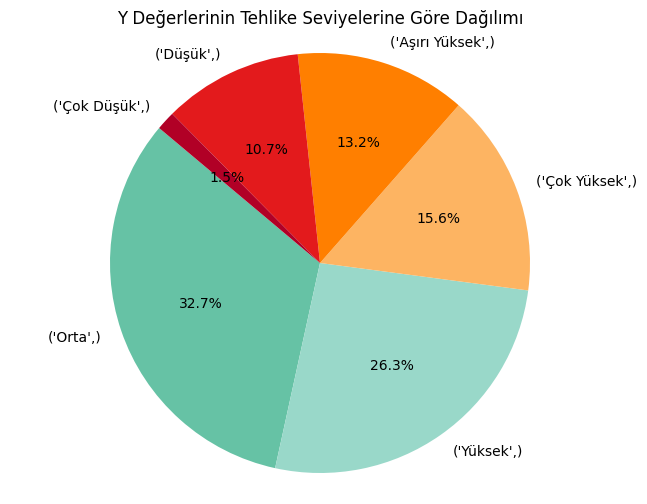

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# y etiketlerini tehlike seviyeleri olarak güncelle
danger_levels = {-2: 'Çok Düşük', -1: 'Düşük', 0: 'Orta', 1: 'Yüksek', 2: 'Çok Yüksek', 3: 'Aşırı Yüksek'}
y = y.replace(danger_levels)

# Benzersiz değerlerin sayısını bul
unique_counts = y.value_counts()
colors = ['#66c2a5', '#99d8c9', '#fdb462', '#ff7f00', '#e31a1c', '#b10026']
# Pasta grafiği çiz
plt.figure(figsize=(8, 6))
plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Y Değerlerinin Tehlike Seviyelerine Göre Dağılımı')
plt.axis('equal')  # Daireyi çevreleyen daireyi çiz
plt.show()


## Korelasyon matrisi

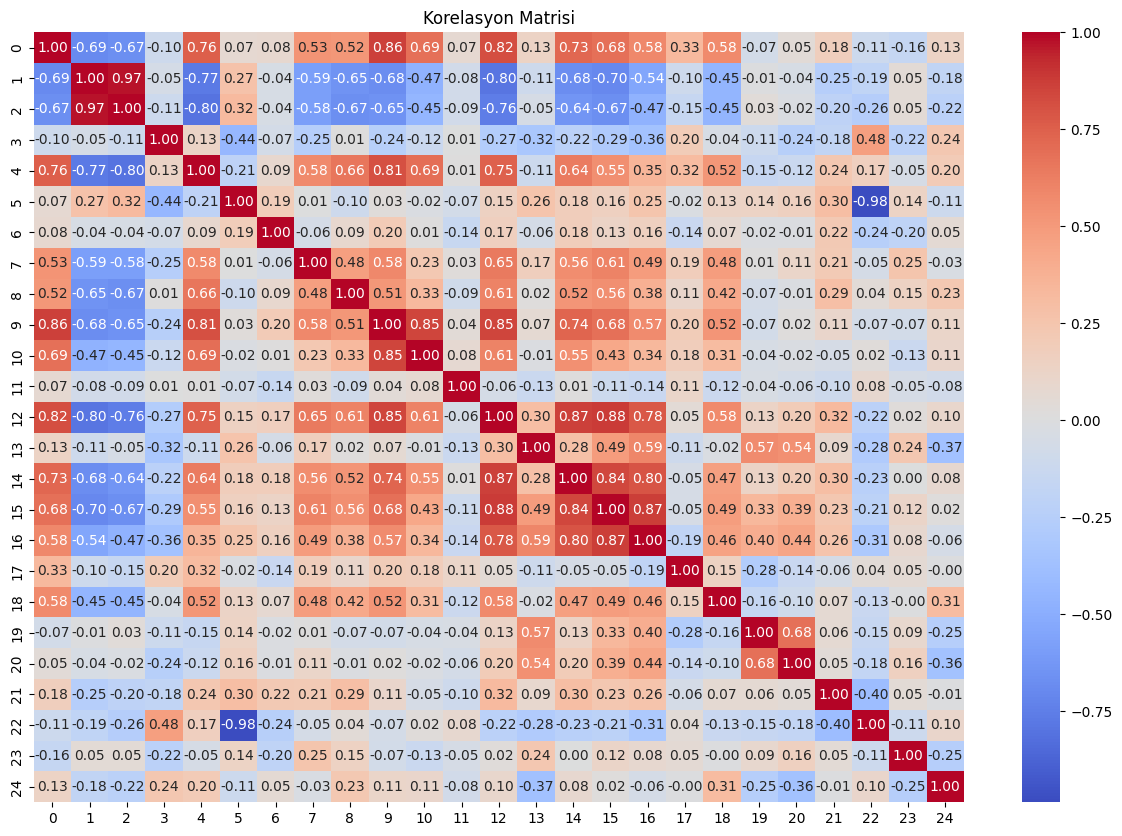

In [17]:
corr_matrisi = X.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrisi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

## Öznitelik Bulma

### Lojistik regresyon algoritmasıyla öznitelik buldum.

In [18]:
# Assuming you have the following part from your initial code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Coefficients
coefficients = log_reg.coef_[0]

# Since you scaled the data, use the original feature names before scaling
features = automobile.data.features.columns

# Finding the top 3 features with the highest coefficients
top_indices = np.argsort(coefficients)[-3:][::-1]
top_features = features[top_indices]
top_coefficients = coefficients[top_indices]

# Displaying the top 3 features with the highest coefficients
for feature, coef in zip(top_features, top_coefficients):
    print(f'En yüksek özniteliğe sahip "{feature}" sütunu ve değeri "{coef}"')


En yüksek özniteliğe sahip "normalized-losses" sütunu ve değeri "1.217225897724287"
En yüksek özniteliğe sahip "aspiration" sütunu ve değeri "0.5899734469879636"
En yüksek özniteliğe sahip "peak-rpm" sütunu ve değeri "0.558257810987229"


In [19]:
# Assuming you have the following part from your initial code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Coefficients
coefficients = log_reg.coef_[0]

# Since you scaled the data, use the original feature names before scaling
features = automobile.data.features.columns

# Finding the bottom 3 features with the lowest coefficients
bottom_indices = np.argsort(coefficients)[:3]
bottom_features = features[bottom_indices]
bottom_coefficients = coefficients[bottom_indices]

# Displaying the bottom 3 features with the lowest coefficients
for feature, coef in zip(bottom_features, bottom_coefficients):
    print(f'En düşük özniteliğe sahip "{feature}" sütunu ve değeri "{coef}"')

En düşük özniteliğe sahip "num-of-doors" sütunu ve değeri "-1.7580211245863213"
En düşük özniteliğe sahip "body-style" sütunu ve değeri "-1.505361120307263"
En düşük özniteliğe sahip "height" sütunu ve değeri "-1.1757101801596497"


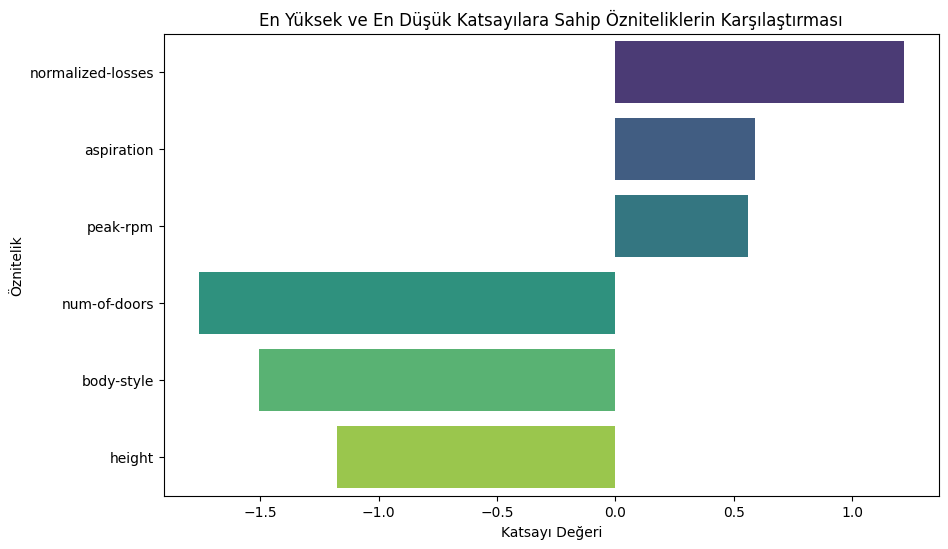

In [20]:
# En yüksek ve en düşük katsayılara sahip öznitelikleri birleştirme
comparison_features = np.concatenate((top_features, bottom_features))
comparison_coefficients = np.concatenate((top_coefficients, bottom_coefficients))

# Özniteliklerin ve katsayıların bir veri çerçevesine dönüştürülmesi
comparison_df = pd.DataFrame({'Feature': comparison_features, 'Coefficient': comparison_coefficients})

# Seaborn çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Coefficient', y='Feature', palette='viridis')
plt.title('En Yüksek ve En Düşük Katsayılara Sahip Özniteliklerin Karşılaştırması')
plt.xlabel('Katsayı Değeri')
plt.ylabel('Öznitelik')
plt.show()

# K-Nearest Neighbour

In [21]:
# Veri setinizi X ve Y değişkenlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-NN modelini oluşturun ve eğitin
knn_model = KNeighborsClassifier(n_neighbors= 5)  # K = 5 olarak ayarladık, değiştirebilirsiniz
knn_model.fit(X_train, y_train)

# Test verilerini kullanarak tahmin yapın
y_pred = knn_model.predict(X_test)

# Doğruluk değerini hesaplayın ve ekrana bastırın
dogruluk = accuracy_score(y_test, y_pred)
print("Doğruluk değeri:", dogruluk)


Doğruluk değeri: 0.6585365853658537


  File "c:\Users\ormec\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## Hiperparametre ayarı

In [22]:
# Denemek istediğiniz K-NN hiperparametrelerini belirleyin
parametreler = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Farklı komşu sayıları
    'weights': ['uniform', 'distance'],  # Farklı ağırlık seçenekleri
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Farklı algoritmalar
    'p': [1, 2]  # Farklı mesafe metrikleri (1: Manhattan, 2: Euclidean)
}


# GridSearchCV kullanarak hiperparametre ayarlaması yapın
grid_search = GridSearchCV(KNeighborsClassifier(), parametreler, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve doğruluk değerini ekrana bastırın
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk değeri:", grid_search.best_score_)

En iyi parametreler: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
En iyi doğruluk değeri: 0.7132575757575758


# Decision Tree

In [23]:
# Veri setinizi X ve Y değişkenlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree modelini oluşturun ve eğitin
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Test verilerini kullanarak tahmin yapın
y_pred = decision_tree_model.predict(X_test)

# Doğruluk değerini hesaplayın ve ekrana bastırın
dogruluk = accuracy_score(y_test, y_pred)
print("Doğruluk değeri:", dogruluk)

Doğruluk değeri: 0.7804878048780488


## Hiperparametre ayarı

In [24]:
parametreler = {
    'criterion': ['gini', 'entropy'],  # Kriter türleri
    'splitter': ['best', 'random'],  # Düğüm bölme stratejileri
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maksimum derinlik
    'min_samples_split': [2, 5, 10],  # Düğüm bölme için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4]  # Yaprak düğümler için minimum örnek sayısı
}

# GridSearchCV kullanarak hiperparametre ayarlaması yapın
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), parametreler, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve doğruluk değerini ekrana bastırın
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk değeri:", grid_search.best_score_)

En iyi parametreler: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
En iyi doğruluk değeri: 0.7736742424242424


# SVM

In [25]:
# Veri setinizi X ve Y değişkenlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM modelini oluşturun ve eğitin
svm_model = SVC(kernel='rbf', random_state=42)  # RBF (Gaussian) çekirdek kullanıyoruz
svm_model.fit(X_train, y_train)

# Test verilerini kullanarak tahmin yapın
y_pred = svm_model.predict(X_test)

# Doğruluk değerini hesaplayın ve ekrana bastırın
dogruluk = accuracy_score(y_test, y_pred)
print("Doğruluk değeri:", dogruluk)


Doğruluk değeri: 0.6341463414634146


## Hiperparametre Ayarı

In [26]:
parametreler = {
    'C': [0.1, 1, 10, 100],  # Düzgünleştirme parametresi
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel fonksiyonları
    'gamma': ['scale', 'auto'],  # Gamma parametresi
    'degree': [2, 3, 4]  # Polinom çekirdek derecesi (sadece 'poly' kernel için)
}

# GridSearchCV kullanarak hiperparametre ayarlaması yapın
grid_search = GridSearchCV(SVC(random_state=42), parametreler, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve doğruluk değerini ekrana bastırın
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk değeri:", grid_search.best_score_)

En iyi parametreler: {'C': 10, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
En iyi doğruluk değeri: 0.7246212121212121


## Lojistik Regresyon

In [27]:


# Veri setinizi X ve Y değişkenlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini oluşturun ve eğitin
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Test verilerini kullanarak tahmin yapın
y_pred = logreg_model.predict(X_test)

# Doğruluk değerini hesaplayın ve ekrana bastırın
dogruluk = accuracy_score(y_test, y_pred)
print("Doğruluk değeri:", dogruluk)


Doğruluk değeri: 0.6341463414634146


## Hiperparametre ayarı

In [28]:
parametreler = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Düzenleme türleri
    'C': [0.01, 0.1, 1, 10, 100],  # Düzenleme gücü
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Optimizasyon algoritmaları
    'max_iter': [100, 200, 300, 400, 500]  # Maksimum iterasyon sayısı
}

# GridSearchCV kullanarak hiperparametre ayarlaması yapın
grid_search = GridSearchCV(LogisticRegression(random_state=42), parametreler, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve doğruluk değerini ekrana bastırın
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk değeri:", grid_search.best_score_)

KeyboardInterrupt: 

## Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes modelini oluşturun ve eğitin
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test verilerini kullanarak tahmin yapın
y_pred = nb_model.predict(X_test)

# Doğruluk değerini hesaplayın ve ekrana bastırın
dogruluk = accuracy_score(y_test, y_pred)
print("Doğruluk değeri:", dogruluk)

Doğruluk değeri: 0.3902439024390244


## Hiperparametre ayarı

In [ ]:
parametreler = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variance smoothing parametresi
}

# GridSearchCV kullanarak hiperparametre ayarlaması yapın
grid_search = GridSearchCV(GaussianNB(), parametreler, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve doğruluk değerini ekrana bastırın
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk değeri:", grid_search.best_score_)

# Test verilerini kullanarak en iyi modelle tahmin yapın
y_pred = grid_search.predict(X_test)

# Doğruluk değerini hesaplayın ve ekrana bastırın
dogruluk = accuracy_score(y_test, y_pred)
print("Test Doğruluk değeri:", dogruluk)

En iyi parametreler: {'var_smoothing': 1e-05}
En iyi doğruluk değeri: 0.4390151515151516
Test Doğruluk değeri: 0.4146341463414634


## Random forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluşturun ve eğitin
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Test verilerini kullanarak tahmin yapın
y_pred = rf_model.predict(X_test)

# Doğruluk değerini hesaplayın ve ekrana bastırın
dogruluk = accuracy_score(y_test, y_pred)
print("Doğruluk değeri:", dogruluk)

Doğruluk değeri: 0.8536585365853658


## Hiperparametre ayarı

In [ ]:
parametreler = {
    'n_estimators': [50, 100, 200],  # Ağaç sayısı
    'max_features': ['auto', 'sqrt', 'log2'],  # Maksimum özellik sayısı
    'max_depth': [None, 10, 20, 30],  # Maksimum derinlik
    'min_samples_split': [2, 5, 10],  # Düğüm bölme için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümler için minimum örnek sayısı
    'bootstrap': [True, False]  # Bootstrap örnekleme yöntemi
}

# GridSearchCV kullanarak hiperparametre ayarlaması yapın
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parametreler, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve doğruluk değerini ekrana bastırın
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk değeri:", grid_search.best_score_)

# Test verilerini kullanarak en iyi modelle tahmin yapın
y_pred = grid_search.predict(X_test)

# Doğruluk değerini hesaplayın ve ekrana bastırın
dogruluk = accuracy_score(y_test, y_pred)
print("Test Doğruluk değeri:", dogruluk)

En iyi parametreler: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
En iyi doğruluk değeri: 0.7981060606060606
Test Doğruluk değeri: 0.8536585365853658
